# Importing libraries and data

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("Loan_Prediction.csv")
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
425,LP002366,Male,Yes,0,Graduate,No,2666,4300.0,121.0,360.0,1.0,Rural,Y
538,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,66.0,360.0,1.0,Rural,N
532,LP002723,Male,No,2,Graduate,No,3588,0.0,110.0,360.0,0.0,Rural,N
31,LP001095,Male,No,0,Graduate,No,3167,0.0,74.0,360.0,1.0,Urban,N
341,LP002116,Female,No,0,Graduate,No,2378,0.0,46.0,360.0,1.0,Rural,N
541,LP002743,Female,No,0,Graduate,No,2138,0.0,99.0,360.0,0.0,Semiurban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y
59,LP001199,Male,Yes,2,Not Graduate,No,3357,2859.0,144.0,360.0,1.0,Urban,Y
250,LP001835,Male,Yes,0,Not Graduate,No,1668,3890.0,201.0,360.0,0.0,Semiurban,N


# Data Cleaning

## 1. Investigation

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [38]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [39]:
df.duplicated().sum()

np.int64(0)

#### Notes
- `Dependents` column contains nulls which may be replaced with 0 and needs to be converted to float
- Almost every row contains small amount of nulls
- The boolean columns `Married`, `Self_Employed`, and `Loan_Status` will be changed to 0 and 1

## 2. Solving data issues

### Working with `Dependents` column

In [40]:
# Replacing the nulls with 0
df["Dependents"] = df["Dependents"].fillna(0)

In [41]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

> The "3+" will be converted to 3 and the whole column will be converted to integer

In [42]:
df["Dependents"] = df["Dependents"].apply(lambda x: int(x.strip('+')) if isinstance(x, str) else x)
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [43]:
df["Dependents"].unique()

array([0, 1, 2, 3])

In [44]:
df["Dependents"].isna().sum()

np.int64(0)

### Handeling missing values

- since every column has small amount of nulls then replacing or dropping them wouldn't affect a lot but i will avoid dropping them since the data is kind of small
- The null values in categorial columns will be replaced with mode
- The null values in numerical columns will be replaced with median since it is safer than mean as it doesn't get affected by outliers

In [45]:
# Defining numerical and categorial columns
num_cols = ["Dependents", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
cat_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed","Credit_History", "Property_Area", "Loan_Status"]   # Although Cridit_History is int it was added to categorial since it can only contain 1 or 0

In [46]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


### Converting Yes or No column with 0, 1

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
def normalize_bool_col(col):
    df[col] = df[col].str.strip().replace({
        "Yes": 1,
        'Y': 1,
        "No": 0,
        "N": 0
    })

In [50]:
normalize_bool_col("Married")
normalize_bool_col("Self_Employed")
normalize_bool_col("Loan_Status")

C:\Users\Youssif\AppData\Local\Temp\ipykernel_15652\1444353021.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [51]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,Male,1,3,Graduate,0,51763,0.0,700.0,300.0,1.0,Urban,1
424,LP002364,Male,1,0,Graduate,0,14880,0.0,96.0,360.0,1.0,Semiurban,1
494,LP002585,Male,1,0,Graduate,0,3597,2157.0,119.0,360.0,0.0,Rural,0
599,LP002948,Male,1,2,Graduate,0,5780,0.0,192.0,360.0,1.0,Urban,1
194,LP001664,Male,0,0,Graduate,0,4191,0.0,120.0,360.0,1.0,Rural,1
50,LP001155,Female,1,0,Not Graduate,0,1928,1644.0,100.0,360.0,1.0,Semiurban,1
144,LP001508,Male,1,2,Graduate,0,11757,0.0,187.0,180.0,1.0,Urban,1
426,LP002367,Female,0,1,Not Graduate,0,4606,0.0,81.0,360.0,1.0,Rural,0
2,LP001005,Male,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
489,LP002556,Male,0,0,Graduate,0,2435,0.0,75.0,360.0,1.0,Urban,0


# Encoding and Feature Scaling

## 1. Encoding numerical values

### The categorial columns will be encoded using one hot encoder

In [52]:
df_encoded = pd.get_dummies(df, columns=['Gender', "Education", "Property_Area"], drop_first=False)
df_encoded

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,0,0,5849,0.0,128.0,360.0,1.0,1,False,True,True,False,False,False,True
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,0,False,True,True,False,True,False,False
2,LP001005,1,0,1,3000,0.0,66.0,360.0,1.0,1,False,True,True,False,False,False,True
3,LP001006,1,0,0,2583,2358.0,120.0,360.0,1.0,1,False,True,False,True,False,False,True
4,LP001008,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,2900,0.0,71.0,360.0,1.0,1,True,False,True,False,True,False,False
610,LP002979,1,3,0,4106,0.0,40.0,180.0,1.0,1,False,True,True,False,True,False,False
611,LP002983,1,1,0,8072,240.0,253.0,360.0,1.0,1,False,True,True,False,False,False,True
612,LP002984,1,2,0,7583,0.0,187.0,360.0,1.0,1,False,True,True,False,False,False,True


> Converting the new encoded columns to integer

In [53]:
cols = ["Gender_Female", "Gender_Male", "Education_Graduate", "Education_Not Graduate", "Property_Area_Rural", "Property_Area_Semiurban", "Property_Area_Urban"]
df_encoded[cols] = df_encoded[cols].apply(lambda x: x.astype(int))
df_encoded.head()

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,0,0,1
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,1,0,0
2,LP001005,1,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,0,0,1
3,LP001006,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,0,1
4,LP001008,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,0,1


## 2. Feature scaling

### All numeric columns will be scaled using standard scaler (except the boolean columns)

In [54]:
from sklearn.preprocessing import StandardScaler

cols =["Dependents", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

scaler = StandardScaler()
df_encoded[cols] = scaler.fit_transform(df_encoded[cols])
df_encoded.head()

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,-0.737806,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1,0,1,1,0,0,0,1
1,LP001003,1,0.253470,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0,1,1,0,1,0,0
2,LP001005,1,-0.737806,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,0,1,1,0,0,0,1
3,LP001006,1,-0.737806,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1,0,1,0,1,0,0,1
4,LP001008,0,-0.737806,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1,0,1,1,0,0,0,1


# Train-Test split

> First i will drop `Loan_ID` since it will be useless

In [55]:
df_encoded = df_encoded.drop("Loan_ID", axis=1)
df_encoded.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,-0.737806,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1,0,1,1,0,0,0,1
1,1,0.253470,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0,1,1,0,1,0,0
2,1,-0.737806,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,0,1,1,0,0,0,1
3,1,-0.737806,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1,0,1,0,1,0,0,1
4,0,-0.737806,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1,0,1,1,0,0,0,1


## 1. Splitting the dataset

In [56]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop("Loan_Status", axis=1)
y = df_encoded["Loan_Status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Modeling

## 1. Logestic Regression without GridSearchCV

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Model training with L1

In [58]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(x_train, y_train)
y_pred_l1 = model_l1.predict(x_test)

### Model training with L2

In [59]:
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(x_train, y_train)
y_pred_l2 = model_l2.predict(x_test)

### models Evaluation

In [60]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f" {model_name} Evaluation:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("")


In [61]:

evaluate_model(y_test, y_pred_l2, "Logistic Regression (L2)")
evaluate_model(y_test, y_pred_l1, "Logistic Regression (L1)")

 Logistic Regression (L2) Evaluation:
Accuracy : 0.8486
Precision: 0.8322
Recall   : 0.9764
F1 Score : 0.8986

 Logistic Regression (L1) Evaluation:
Accuracy : 0.8541
Precision: 0.8333
Recall   : 0.9843
F1 Score : 0.9025



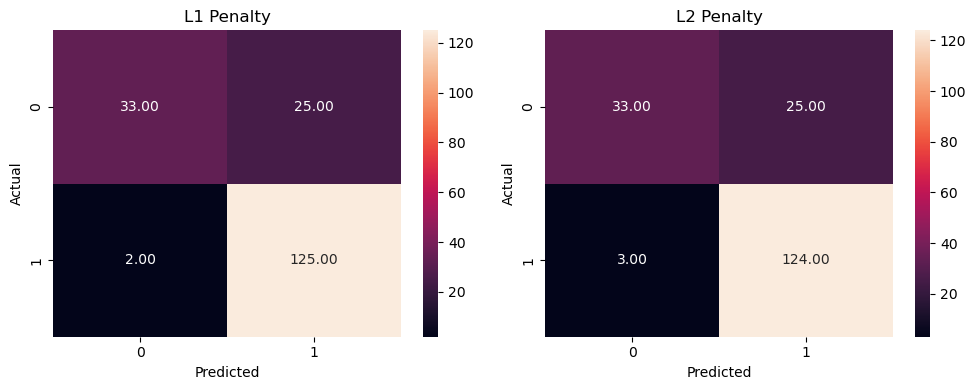

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

cm_l1 = confusion_matrix(y_test, y_pred_l1)
cm_l2 = confusion_matrix(y_test, y_pred_l2)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(cm_l1, annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("L1 Penalty")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_l2, annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("L2 Penalty")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


L1 Logistic Regression AUC: 0.8223
L2 Logistic Regression AUC: 0.8228


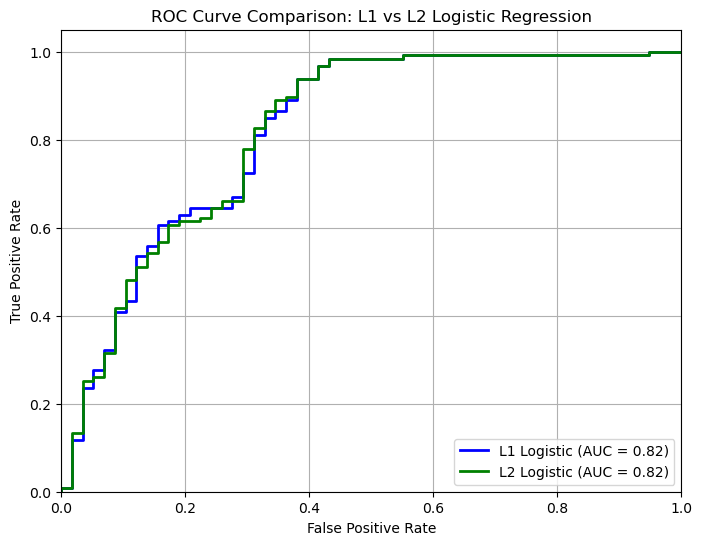

In [63]:
# ROC and AUC Score

y_prob_l1 = model_l1.predict_proba(x_test)[:, 1]
y_prob_l2 = model_l2.predict_proba(x_test)[:, 1]

fpr_l1, tpr_l1, _ = roc_curve(y_test, y_prob_l1)
fpr_l2, tpr_l2, _ = roc_curve(y_test, y_prob_l2)

# Calcualating AUC
auc_l1 = roc_auc_score(y_test, y_prob_l1)
auc_l2 = roc_auc_score(y_test, y_prob_l2)

print(f"L1 Logistic Regression AUC: {auc_l1:.4f}")
print(f"L2 Logistic Regression AUC: {auc_l2:.4f}")

# Plotting ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_l1, tpr_l1, color='blue', lw=2, label=f'L1 Logistic (AUC = {auc_l1:.2f})')
plt.plot(fpr_l2, tpr_l2, color='green', lw=2, label=f'L2 Logistic (AUC = {auc_l2:.2f})')


plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: L1 vs L2 Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Logestic Regression with GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

model_grid = LogisticRegression()

param_grid = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [0.01, 0.013, 0.02, 0.03, 0.05, 0.06, 0.07],
    "solver": ["liblinear", "newton-cg", "lbfgs", "sag", "saga"],
    "l1_ratio": [0, 0.5, 1]
}

grid_search = GridSearchCV(
    estimator=model_grid,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'C': 0.013, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.8670971766554224


c:\Users\Youssif\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


735 fits failed out of a total of 1575.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Youssif\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Youssif\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Youssif\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
 

In [65]:
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print("Precision:", precision_score(y_test, y_pred_grid))
print("Recall:", recall_score(y_test, y_pred_grid))
print("F1 Score:", f1_score(y_test, y_pred_grid))


Accuracy: 0.8486486486486486
Precision: 0.8278145695364238
Recall: 0.984251968503937
F1 Score: 0.8992805755395683


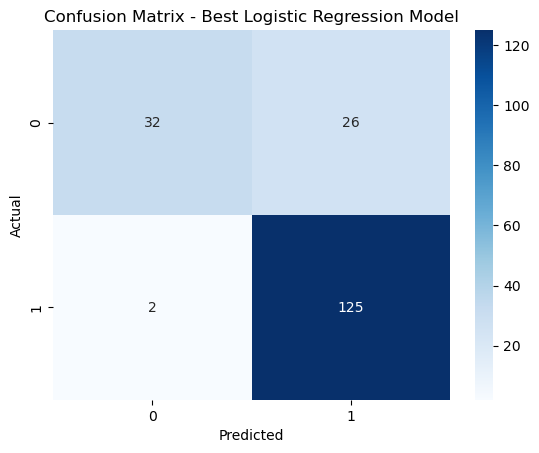

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Logistic Regression Model")
plt.show()


# Comparing Models

#### Static version for GitHub

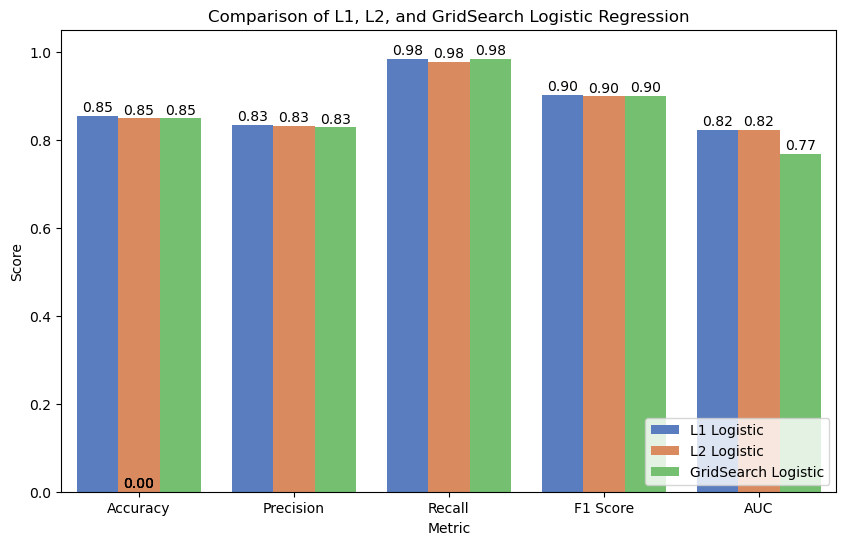

In [67]:
# Saving the results in a dataframe to plot it
results = [
    {
        "Model": "L1 Logistic",
        "Accuracy": accuracy_score(y_test, y_pred_l1),
        "Precision": precision_score(y_test, y_pred_l1),
        "Recall": recall_score(y_test, y_pred_l1),
        "F1 Score": f1_score(y_test, y_pred_l1),
        "AUC": roc_auc_score(y_test, y_prob_l1)
    },
    {
        "Model": "L2 Logistic",
        "Accuracy": accuracy_score(y_test, y_pred_l2),
        "Precision": precision_score(y_test, y_pred_l2),
        "Recall": recall_score(y_test, y_pred_l2),
        "F1 Score": f1_score(y_test, y_pred_l2),
        "AUC": roc_auc_score(y_test, y_prob_l2)
    },
    {
        "Model": "GridSearch Logistic",
        "Accuracy": accuracy_score(y_test, y_pred_grid),
        "Precision": precision_score(y_test, y_pred_grid),
        "Recall": recall_score(y_test, y_pred_grid),
        "F1 Score": f1_score(y_test, y_pred_grid),
        "AUC": roc_auc_score(y_test, y_pred_grid)
    }
]

df_results = pd.DataFrame(results)

df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model", palette="muted")

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2, y=height + 0.01, s=f'{height:.2f}', ha='center')

plt.title("Comparison of L1, L2, and GridSearch Logistic Regression")
plt.ylim(0,1.05)
plt.legend(loc='lower right')
plt.show()


### Interactive version for better visualization

In [68]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = [
    {
        "Model": "L1 Logistic",
        "Accuracy": accuracy_score(y_test, y_pred_l1),
        "Precision": precision_score(y_test, y_pred_l1),
        "Recall": recall_score(y_test, y_pred_l1),
        "F1 Score": f1_score(y_test, y_pred_l1),
        "AUC": roc_auc_score(y_test, y_prob_l1)
    },
    {
        "Model": "L2 Logistic",
        "Accuracy": accuracy_score(y_test, y_pred_l2),
        "Precision": precision_score(y_test, y_pred_l2),
        "Recall": recall_score(y_test, y_pred_l2),
        "F1 Score": f1_score(y_test, y_pred_l2),
        "AUC": roc_auc_score(y_test, y_prob_l2)
    },
    {
        "Model": "GridSearch Logistic",
        "Accuracy": accuracy_score(y_test, y_pred_grid),
        "Precision": precision_score(y_test, y_pred_grid),
        "Recall": recall_score(y_test, y_pred_grid),
        "F1 Score": f1_score(y_test, y_pred_grid),
        "AUC": roc_auc_score(y_test, y_pred_grid)
    }
]

df_results = pd.DataFrame(results)

df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

fig = px.bar(df_melted, x="Metric", y="Score", color="Model", barmode="group",
            title="Comparison of L1, L2, and GridSearch Logistic Regression",
            text="Score", height=500)

fig.update_layout(yaxis=dict(range=[0,1.05]))
fig.show()
